# Introduction

This project aims to predict the optimal roasting conditions for coffee by utilizing a neural network model. The inputs for this model consist of two variables: temperature in celsius and time duration in minutes. The output will be binary, represented by 1 or 0, indicating whether the coffee is optimally roasted or not. Our focus is to determine the most suitable conditions for achieving the best roasting results.

# Importing Libraries

In [105]:
# If you are using conda then install the follwing packages in your current environment first
# conda install -n ENVNAME PKGNAME PKGNAME PKGNAME ...
# conda install -n Coffee_Roasting pandas tensorflow python=3.9 matplotlib openpyxl

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Dataset Processing

In [107]:
df = pd.read_excel('Dataset.xlsx')
df.head()

,Temperature (Celsiuis),Duration (Minutes),Output
0,185.32,12.69,1
1,259.92,11.87,0
2,231.01,14.41,0
3,175.37,11.72,0
4,187.12,14.13,1


In [108]:
X = df[['Temperature (Celsiuis)', 'Duration (Minutes)']]
Y = df['Output'].values.reshape(-1 ,1)
print(X.shape, Y.shape)

(200, 2) (200, 1)


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (Celsiuis)  200 non-null    float64
 1   Duration (Minutes)      200 non-null    float64
 2   Output                  200 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 4.8 KB


# Normalization

In [110]:
#Before normalization
print(f"Temperature Max, Min: {np.max(X['Temperature (Celsiuis)']):0.2f}, {np.min(X['Temperature (Celsiuis)']):0.2f}")
print(f"Duration Max, Min: {np.max(X['Duration (Minutes)']):0.2f}, {np.min(X['Duration (Minutes)']):0.2f}")

norm_l = tf.keras.layers.Normalization(axis = -1) # apply normalization
norm_l.adapt(X) # Learns means and variance
Xn = norm_l(X)

#After normalization
print(f"Temperature Max, Min: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration Max, Min: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

Temperature Max, Min: 284.99, 151.32
Duration Max, Min: 15.45, 11.51
Temperature Max, Min: 1.66, -1.66
Duration Max, Min: 1.80, -1.70


# To increase the dataset

In [111]:
# Tile/copy our data to increase the training set size and reduce the number of training epochs.
Xt =np.tile(Xn,(1000,1))
Yt =np.tile(Y, (1000, 1))
print(Xt.shape, Yt.shape)

(200000, 2) (200000, 1)


# Data Visualization

C:\Users\dell\anaconda3\envs\Coffee_Roasting\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\dell\anaconda3\envs\Coffee_Roasting\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


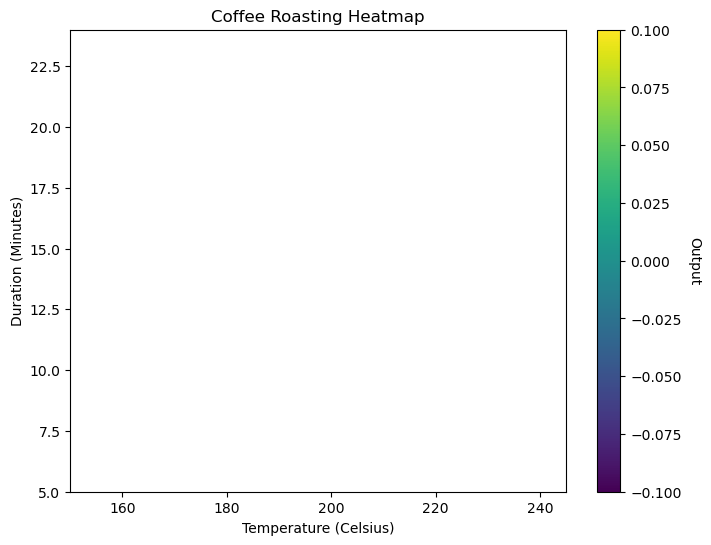

In [112]:
# Define the temperature and duration ranges
temp_range = np.arange(150, 250, 5)
dur_range = np.arange(5, 25, 1)

# Initialize output grid
output_grid = np.zeros((len(dur_range), len(temp_range)))

# Compute the output for each temperature and duration value
for i, temp in enumerate(temp_range):
    for j, dur in enumerate(dur_range):
        idx = (X['Temperature (Celsiuis)'] == temp) & (X['Duration (Minutes)'] == dur)
        output_grid[j, i] = np.mean(Y[idx])

# Plot the output as a heatmap
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(output_grid, cmap='viridis', aspect='auto', extent=[temp_range.min(), temp_range.max(), dur_range.min(), dur_range.max()])
ax.set_title('Coffee Roasting Heatmap')
ax.set_xlabel('Temperature (Celsius)')
ax.set_ylabel('Duration (Minutes)')
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Output', rotation=-90, va="bottom")
plt.show()


# Tensorflow Model

In [113]:
tf.random.set_seed(1234)  # applied to achieve consistent results

model = Sequential([
    tf.keras.Input(shape=(2,)),
    Dense(3, activation='sigmoid', name='layer1'),
    Dense(1, activation='sigmoid', name='layer2')
])


In [114]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 3)                 9         
                                                                 
 layer2 (Dense)              (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


- **How to calculate the parameters?**

1. These are weights and biases. 
2. The weights 𝑊 should be of size (number of features in input, number of units in the layer) 
3. While the bias  𝑏 size should match the number of units in the layer.

4. Layer = # W + b <br>
5. Layer = (Number of input features * number of units in the layer) +  number of units in the layer

6. Layer1 = 2 * 3 + 3 = 9 <br>
7. Layer2 = 1 * 3 + 1 = 4 <br>
8. Total = 9 + 4 = 13 

In [115]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

In [116]:
model.fit(Xt, Yt, epochs=10)

Epoch 1/10
6250/6250 [==============================] - 9s 1ms/step - loss: 0.2882
Epoch 2/10
6250/6250 [==============================] - 8s 1ms/step - loss: 0.1374
Epoch 3/10
6250/6250 [==============================] - 8s 1ms/step - loss: 0.1274
Epoch 4/10
6250/6250 [==============================] - 9s 1ms/step - loss: 0.1193
Epoch 5/10
6250/6250 [==============================] - 8s 1ms/step - loss: 0.1125
Epoch 6/10
6250/6250 [==============================] - 9s 1ms/step - loss: 0.1074
Epoch 7/10
6250/6250 [==============================] - 9s 1ms/step - loss: 0.0367
Epoch 8/10
6250/6250 [==============================] - 8s 1ms/step - loss: 0.0135
Epoch 9/10
6250/6250 [==============================] - 9s 1ms/step - loss: 0.0091
Epoch 10/10
6250/6250 [==============================] - 10s 2ms/step - loss: 0.0065


# Predictions

Recall, we have normalized the input features so we must normalize our test data as well.

In [93]:
# prediction input
X_test = np.array([
    [200,13.9],
    [200,17]])

# prediction normalization
X_testn =norm_l(X_test)

# let's predict
predictions = model.predict(X_testn)
print("predictions = \n", predictions)

1/1 [==============================] - 0s 27ms/step
predictions = 
 [[9.8930621e-01]
 [2.1582024e-07]]


- **To convert the probabilities to a decision, we apply a threshold:**


In [101]:
yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
print(f"Final Decesion = \n{yhat}")

Final Decesion = 
[[1.]
 [0.]]
